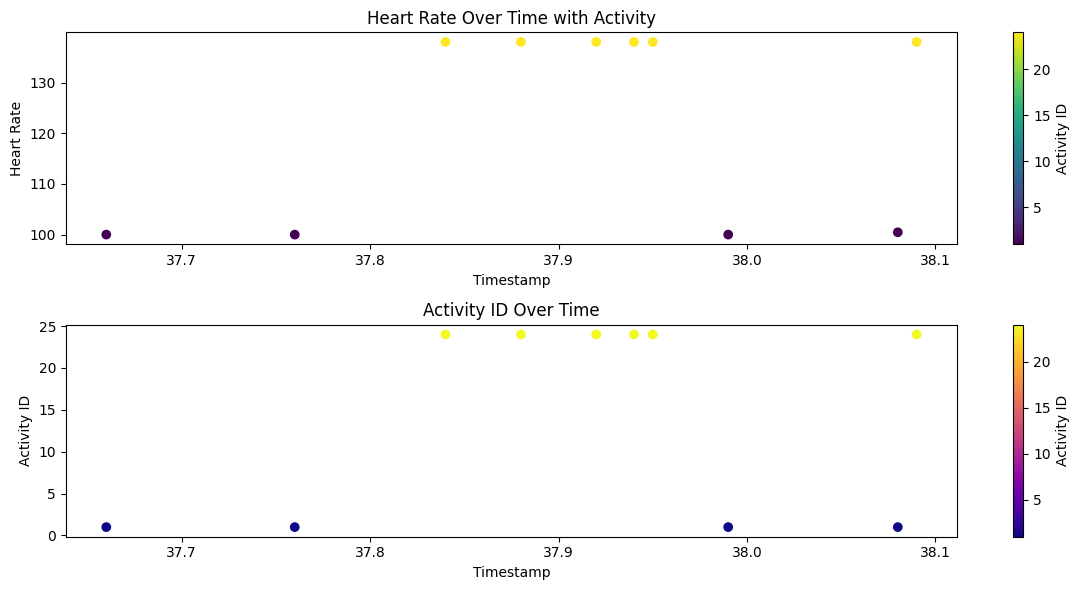

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from langchain.llms import Ollama

# Load dataset
df = pd.read_csv("cleaned_data.csv")

# Example timestamp range (modify as needed)
timestamp_start = 37.6
timestamp_end = 38.1  

# Filter data by timestamp range
filtered_df = df[(df['timestamp'] >= timestamp_start) & (df['timestamp'] <= timestamp_end)]

# Sample a smaller subset to speed up processing
sampled_df = filtered_df.sample(n=min(10, len(filtered_df)), random_state=42)

# Initialize TinyLlama via Ollama
llm = Ollama(model="tinyllama")

# Mapping activity IDs to meaningful labels
activity_labels = {
    1: "Lying", 2: "Sitting", 3: "Standing", 4: "Walking", 5: "Running",
    6: "Cycling", 7: "Nordic Walking", 9: "Watching TV", 10: "Computer Work",
    11: "Car Driving", 12: "Ascending Stairs", 13: "Descending Stairs", 16: "Vacuum Cleaning",
    17: "Ironing", 18: "Folding Laundry", 19: "House Cleaning", 20: "Playing Soccer",
    24: "Rope Jumping", 0: "Other (Transient Activities)"
}

# Look at 5 previous and 5 next timestamps for context
# I am taking a sliding window approach 

window_size = 5 
def label_data_with_context(idx, df):
    subset = df.iloc[max(0, idx - window_size): min(len(df), idx + window_size)]
    prompt = (
        f"Analyze the trend in the following time-series data:\n{subset.to_dict(orient='records')}\n"
        f"Assign a consistent label based on activity patterns. Return only the label."
    )
    response = llm.predict(prompt)
    return response.strip()


# Apply labeling to the sampled data
sampled_df["label"] = [label_data_with_context(i, sampled_df) for i in range(len(sampled_df))]


# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.scatter(sampled_df["timestamp"], sampled_df["heartrate"], c=sampled_df["activityID"], cmap='viridis')
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Over Time with Activity")
plt.colorbar(label="Activity ID")

plt.subplot(2, 1, 2)
plt.scatter(sampled_df["timestamp"], sampled_df["activityID"], c=sampled_df["activityID"], cmap='plasma')
plt.xlabel("Timestamp")
plt.ylabel("Activity ID")
plt.title("Activity ID Over Time")
plt.colorbar(label="Activity ID")

plt.tight_layout()
plt.show()





In [19]:
print(sampled_df[["timestamp", "heartrate", "activityID", "label"]])


         timestamp   heartrate  activityID  \
1937156      37.95  138.000000          24   
1937153      37.92  138.000000          24   
1937149      37.88  138.000000          24   
1937170      38.09  138.000000          24   
33           37.99  100.000000           1   
1937155      37.94  138.000000          24   
1937145      37.84  138.000000          24   
42           38.08  100.454545           1   
0            37.66  100.000000           1   
10           37.76  100.000000           1   

                                                     label  
1937156  The provided dataset contains data on various ...  
1937153  To assign a consistent label based on activity...  
1937149  Here's an implementation of the `predict_proba...  
1937170  Based on the data provided, the optimal label ...  
33       Based on the dataset provided, the best approa...  
1937155  Here's an implementation of `get_label()` func...  
1937145  The provided data contains multiple datasets w...  
42   

In [20]:
import pandas as pd
df = pd.read_csv("cleaned_data.csv")
df.columns

Index(['Unnamed: 0', 'timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id']